# **Machine Learning Practice - Week 2**


# Import basic libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sklearn
from sklearn import datasets
from pandas.plotting import scatter_matrix
plt.style.use('seaborn')

# Introducing the dataset

---



**California Housing dataset**

The original database is available from StatLib http://lib.stat.cmu.edu/datasets/.
This dataset the following input variables (features):
* MedInc - median income in block
* HouseAge - median house age in block
* AveRooms - average number of rooms
* AveBedrms - average number of bedrooms
* Population - block population
* AveOccupancy - average house occupancy
* Latitude - house block latitude
* Longitude - house block longitude

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

    ==============   ==============
    Samples total             20640
    Dimensionality                8
    Features                   real
    Target           real 0.15 - 5.
    ==============   ==============

In [ ]:
# X, Y = sklearn.datasets.fetch_california_housing(return_X_y=True)
dataset = sklearn.datasets.fetch_california_housing()
X, y = dataset.data, dataset.target

print('shape of attributes', X.shape)
print('shape of target', y.shape)

shape of attributes (20640, 8)
shape of target (20640,)


In [ ]:
data=pd.DataFrame(X,columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
                               'Population', 'AveOccupancy', 'Latitude', 'Longitude'])
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccupancy,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccupancy,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


# Visualization of the data

---



Let us have a look at the range and distribution of the target and input features by plotting their histograms.

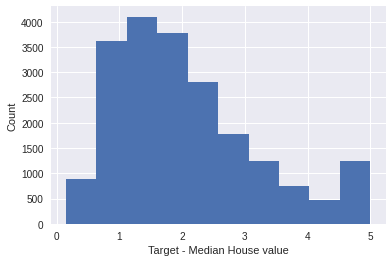

In [ ]:
plt.hist(y)
plt.xlabel('Target - Median House value')
plt.ylabel('Count')
plt.show()

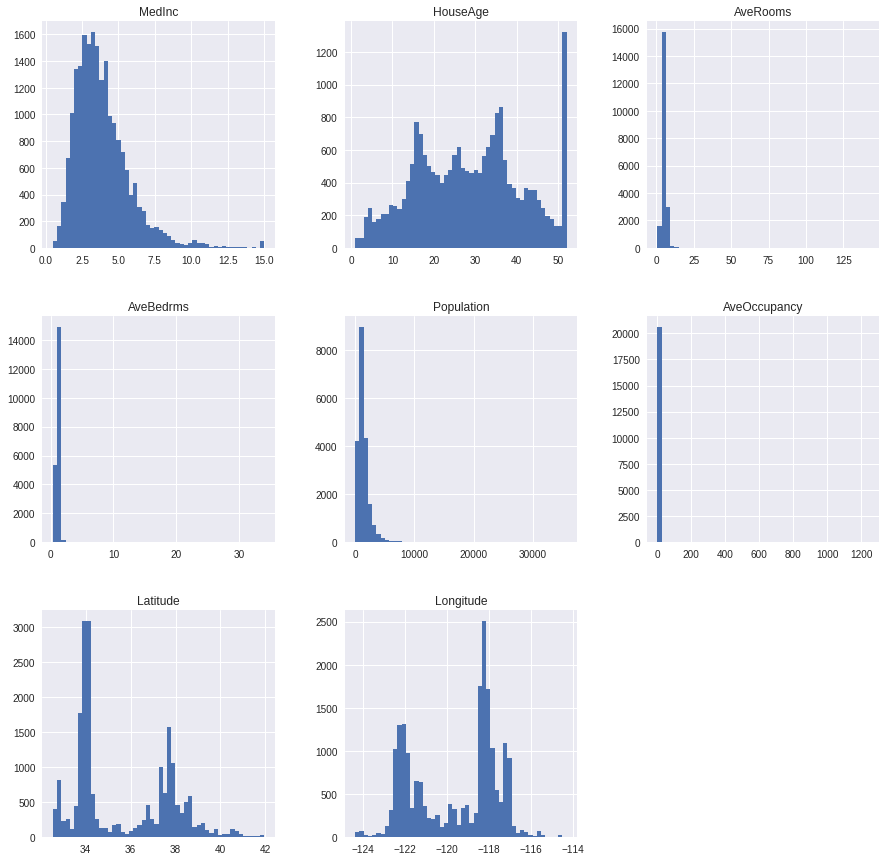

In [ ]:
data.hist(bins=50,figsize=(15,15))
# display histogram
plt.show()

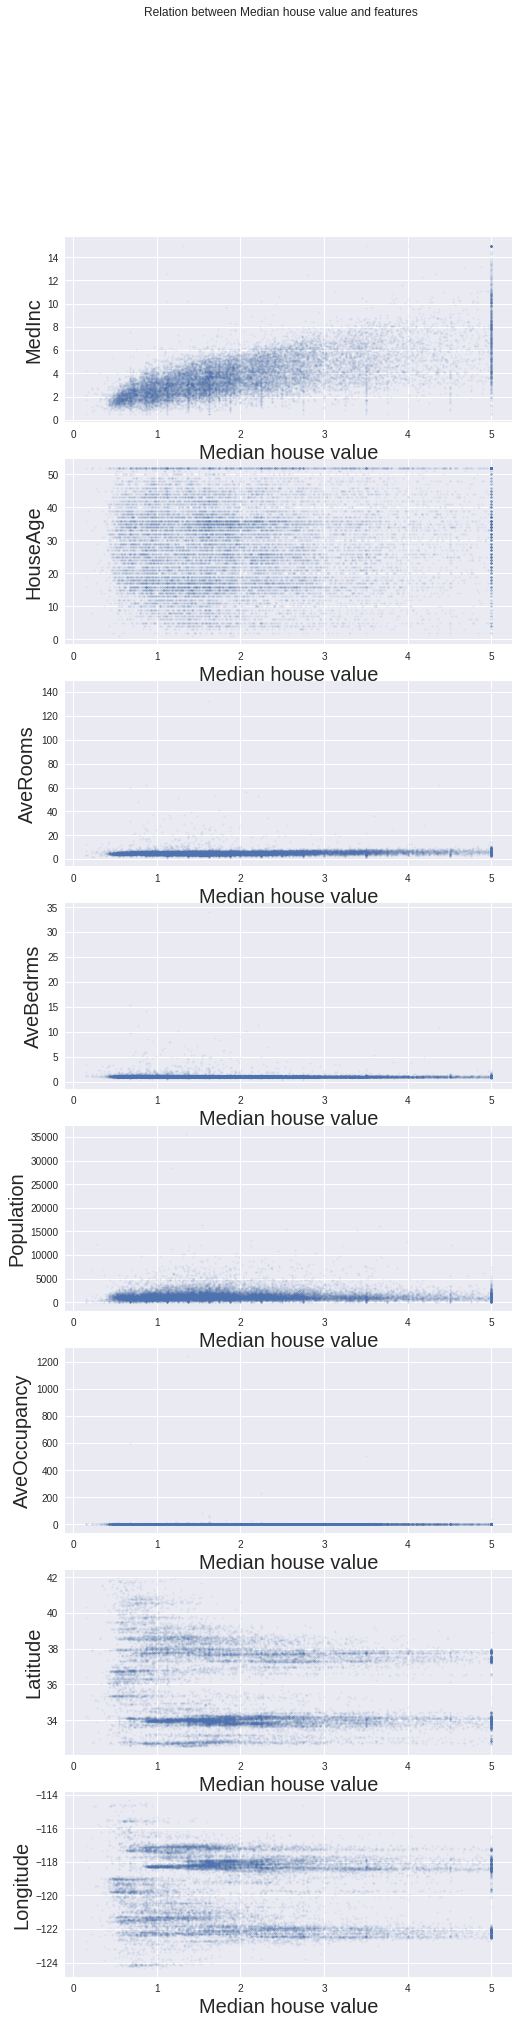

In [ ]:
i=1
plt.figure(figsize=(8,32))

for colname in data:
  plt.subplot(8,1,i)
  # plt.subplot(4,2,i)
  plt.scatter(y,data[colname].values, alpha=0.08, s=3)
  plt.xlabel('Median house value', fontsize = 20)
  plt.ylabel(colname, fontsize = 20)
  i+=1
plt.suptitle("Relation between Median house value and features")
plt.show()

You can notice a wide range of feature distribution.
Also there are outliers in some features.

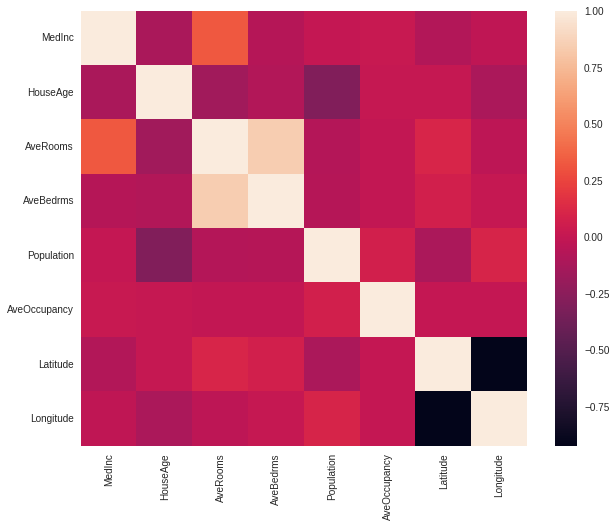

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr())
plt.show()

You can observe that Median Income is positively correlated with Average Rooms but negatively correlated with HouseAge

## Cleaning the data

---



### 1. Identification of features that only have a single value.





In [ ]:
# get number of unique values for each column
counts = data.nunique()
print(counts)

# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print('Columns with single value', to_del)
# drop useless columns
data.drop(to_del, axis=1, inplace=True)
print(data.shape)

MedInc          12928
HouseAge           52
AveRooms        19392
AveBedrms       14233
Population       3888
AveOccupancy    18841
Latitude          862
Longitude         844
dtype: int64
Columns with single value []
(20640, 8)


Since there are no columns with single value, no need to drop any column at this stage.

### 2.  Identification of features with very few unique values.


In [ ]:
Name_List = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
             'Population', 'AveOccupancy', 'Latitude', 'Longitude']

In [ ]:
col_todel=[]
print('Feature name, Number of unique values, Percentage of unique values out of all rows in the dataset')

for i in range(data.shape[1]):
  col=list(data[Name_List[i]])
  num = np.unique(col).size
  percentage = float(num / data.shape[0]) * 100
  if percentage < 1:
      col_todel.append(i)
  print('%s, %d, %.1f%%' % (Name_List[i], num, percentage))
print('\n Column to delete', col_todel)
for j in col_todel:
  print('\n Feature to delete', Name_List[j])

Feature name, Number of unique values, Percentage of unique values out of all rows in the dataset
MedInc, 12928, 62.6%
HouseAge, 52, 0.3%
AveRooms, 19392, 94.0%
AveBedrms, 14233, 69.0%
Population, 3888, 18.8%
AveOccupancy, 18841, 91.3%
Latitude, 862, 4.2%
Longitude, 844, 4.1%

 Column to delete [1]

 Feature to delete HouseAge


In [ ]:
data1=data.copy() # original features will be retained in data
# drop useless columns
for i in col_todel:
  data1.drop(Name_List[i], axis=1, inplace=True)
print(data1.shape)

(20640, 7)


### 3. Identification of rows that contain duplicate observations.

In [ ]:
# delete duplicate rows
data1.drop_duplicates(inplace=True)
print(data1.shape)

(20640, 7)


# Create Train and Test data

---



In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data1, y, test_size=0.2, random_state=1)

In [ ]:
print('Shape of training data',X_train.shape)
print('Shape of training labels',y_train.shape)
print('Shape of testing data',X_test.shape)
print('Shape of testing labels',y_test.shape)

Shape of training data (16512, 7)
Shape of training labels (16512,)
Shape of testing data (4128, 7)
Shape of testing labels (4128,)


# **Linear Regression**

Import basic libraries

In [ ]:
# import model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn import metrics

Selection of scalers from sklearn.preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, PolynomialFeatures
# from sklearn.preprocessing import QuantileTransformer, PowerTransformer

MSE =  0.5380990250708308


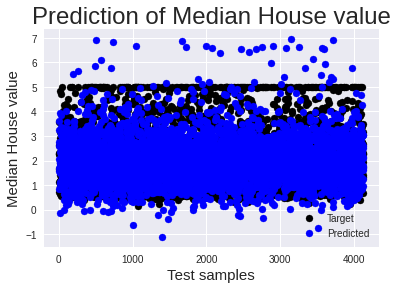

Score: 0.60 %


In [ ]:
linear_regression = LinearRegression()
mmscaler = MinMaxScaler()
X_train_norm = mmscaler.fit_transform(X_train)
X_test_norm = mmscaler.transform(X_test)

linear_regression.fit(X_train_norm, y_train)
y_pred = linear_regression.predict(X_test_norm)
mse = metrics.mean_squared_error(y_test, y_pred)
print('MSE = ', mse)
# Plot outputs
x_range=range(X_test.shape[0])
plt.scatter(x_range, y_test,  color='black')
plt.scatter(x_range, y_pred, color='blue')
plt.title('Prediction of Median House value', size=24)
plt.xlabel('Test samples', size=15)
plt.ylabel('Median House value',size=15)
plt.legend(labels=['Target', 'Predicted'])
plt.show()

# Evaluate the models using pipeline and crossvalidation
linear_regression1 = LinearRegression()
pipe_1 = Pipeline([('scaler', MinMaxScaler()),
                         ("regression", linear_regression1)])
pipe_1.fit(X_train,y_train)
scores = cross_val_score(linear_regression1, X_train, y_train,cv=10)
print("Score: {:.2f} %".format(scores.mean()))

**Exercise:** Try with other scalers.

# **PolynomialFeatures**

Polynomial Features(degree=d) transforms an array containing $n$
features into an array containing $\frac {(n+d)!}{d!n!} $ features. Let us try with a $2^{nd}$ degree polynomial.

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
mmscaler = MinMaxScaler()
X_trainpoly = poly_features.fit_transform(X_train)
X_testpoly = poly_features.fit_transform(X_test)

X_train_norm = mmscaler.fit_transform(X_trainpoly)
X_test_norm = mmscaler.transform(X_testpoly)
print(X_train_norm[0].shape)

(35,)


In [ ]:
print(X_trainpoly[0].shape)

(35,)


MSE =  0.47799573854496114


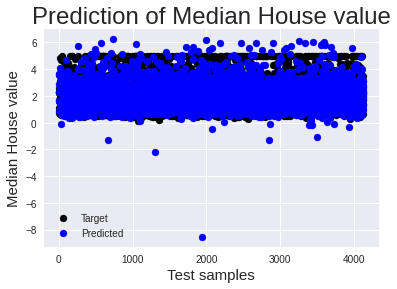

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_trainpoly, y_train)
y_pred = lin_reg.predict(X_testpoly)
mse = metrics.mean_squared_error(y_test, y_pred)
print('MSE = ', mse)
# Plot outputs
x_range=range(X_test.shape[0])
plt.scatter(x_range, y_test,  color='black')
plt.scatter(x_range, y_pred, color='blue')
plt.title('Prediction of Median House value', size=24)
plt.xlabel('Test samples', size=15)
plt.ylabel('Median House value',size=15)
plt.legend(labels=['Target', 'Predicted'])
plt.show()

Let us increase the degree of polynomial to 3 and see what happens.

(119,)
MSE =  1.551614116199306


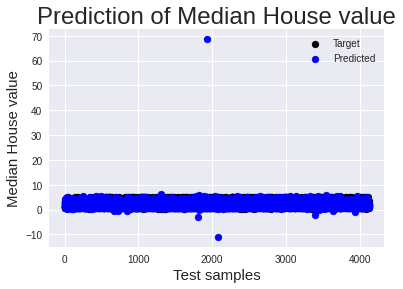

In [ ]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
mmscaler = MinMaxScaler()
X_trainpoly = poly_features.fit_transform(X_train)
X_testpoly = poly_features.fit_transform(X_test)

X_train_norm = mmscaler.fit_transform(X_trainpoly)
X_test_norm = mmscaler.transform(X_testpoly)

print(X_trainpoly[0].shape)
lin_reg = LinearRegression()
lin_reg.fit(X_trainpoly, y_train)
y_pred = lin_reg.predict(X_testpoly)
mse = metrics.mean_squared_error(y_test, y_pred)
print('MSE = ', mse)

# Plot outputs
x_range=range(X_test.shape[0])
plt.scatter(x_range, y_test,  color='black')
plt.scatter(x_range, y_pred, color='blue')
plt.title('Prediction of Median House value', size=24)
plt.xlabel('Test samples', size=15)
plt.ylabel('Median House value',size=15)
plt.legend(labels=['Target', 'Predicted'])
plt.show()

What happened?

---



MSE has increased beyond 1.

# **Learning Curves**

- Plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration).
- To generate the plots, simply train the model several times on different sized subsets of the training set.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  scaler = StandardScaler()
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  X_train_norm = scaler.fit_transform(X_train)
  X_val_norm = scaler.transform(X_val)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train_norm),100):
    model.fit(X_train_norm[:m], y_train[:m])
    y_train_predict = model.predict(X_train_norm[:m])
    y_val_predict = model.predict(X_val_norm)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
  plt.xlabel('Train set size', fontsize = 22)
  plt.ylabel('RMSE', fontsize = 22)
  plt.legend()
  print('Train Erros', train_errors)

Let’s look at the learning curves of the plain Linear Regression model



Train Erros [0.0, 0.5924496562085271, 0.4957569646821756, 0.5091571110603256, 0.5413095286980336, 0.5488549924790553, 0.5511663775345746, 0.5491112958825088, 0.5418302466356277, 0.5245812345932833, 0.5185121432170898, 0.5221721419390918, 0.53009649202102, 0.5619641538374796, 0.547231239011107, 0.5670367845224352, 0.5645052792318795, 0.5669743768745872, 0.5659034999506714, 0.5514083531111871, 0.551649997641126, 0.5480151542985292, 0.5514069780566873, 0.551221471621437, 0.5458065614071044, 0.5434495994602139, 0.5422694701295726, 0.5365604688464993, 0.5450895034966959, 0.541371843521457, 0.5417572653656015, 0.5439476328301306, 0.5464361353530036, 0.5457085861146052, 0.5452396559329996, 0.5470988487190575, 0.5409360773477987, 0.5394944759285755, 0.5381344316796927, 0.5360266152563218, 0.5330170746357353, 0.544274956410379, 0.5385252573919922, 0.5372842706571387, 0.5411937258529279, 0.5444536284990265, 0.5454129488410503, 0.542522518635895, 0.5386303417094677, 0.5373619304886802, 0.53588980

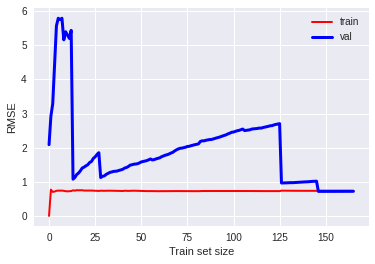

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,data1,y)

**Inference**:
* These learning curves are typical of an underfitting model. Both curves have reached a plateau; they are close and fairly high.
* Few instances in the training set means the model can fit them perfectly. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly.
*  When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then as the model is shown more training examples, it learns and thus the validation error slowly goes down.

Let’s look at the learning curves of the  Polynomial Regression model

---

Train Erros [0.0, 0.1709999969665855, 0.21698272427749002, 0.34020002907050134, 0.3533230472200753, 0.3716968808606282, 0.36803451209272725, 0.37657135762555893, 0.38468072670801473, 0.38028961186835464, 0.3769298738610837, 0.3698871150542112, 0.3680979612535067, 0.36100518499403444, 0.3683697414952833, 0.37047958271196957, 0.39830412803169096, 0.4054850428590284, 0.410390203731036, 0.4034168297621465, 0.40711744120049775, 0.4124962281889075, 0.40664024920907094, 0.4057212126853853, 0.402091659855463, 0.40114418395325574, 0.4009888604815743, 0.3999975658103523, 0.40291388331218037, 0.401730259074568, 0.40221481831189254, 0.40473518325657126, 0.4014095568106837, 0.4042909357909485, 0.4040909574310324, 0.4047683075735637, 0.40897298244156577, 0.4062630809859408, 0.40545801202400295, 0.405101510877235, 0.410056969556721, 0.411200502639341, 0.41610997655943227, 0.4159080981097127, 0.4143911277661407, 0.4144991083894143, 0.4129951276275287, 0.4309552057931961, 0.4283329725958068, 0.42826600

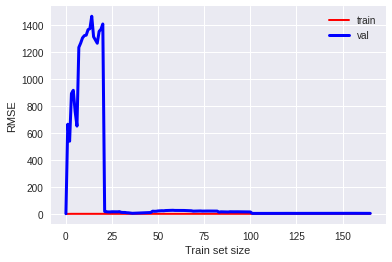

In [ ]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
                                  ("lin_reg", LinearRegression()),])
plot_learning_curves(polynomial_regression,data1, y)

**Inference:**
Do these learning curves look a bit like the previous ones?
No
* The error on the training data is lower than with the Linear Regression model. This means that the model performs better on the training data than on the validation data. Overfitting occured.
* One way to improve an overfitting model is to feed it more training
data until the validation error reaches the training error.

# **Regularized Linear Models**

For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at two ways to constrain the weights.
* Ridge Regression
* Lasso Regression

### **Ridge Regression**

Train Erros [0.0, 0.3892265062360528, 0.4177128262322926, 0.42388255846505746, 0.4853842858502809, 0.46731815379005964, 0.4793498212625132, 0.5067886582437837, 0.50782109172497, 0.5006956929461084, 0.5289062285631525, 0.5051698039186525, 0.49715634599232056, 0.49166553793977885, 0.4896725975720945, 0.5034058864818031, 0.49884819384472245, 0.49364893067404997, 0.4978507960552859, 0.49816903405862273, 0.4956556052113826, 0.4911747959205688, 0.48341043077734114, 0.49044900662493773, 0.4924866905285114, 0.4882602851748729, 0.48600910575052764, 0.4799411232792542, 0.4810401186842765, 0.47672784773216365, 0.47145810483099854, 0.47549061234775364, 0.47388211521978635, 0.4690830640598628, 0.46154461265261587, 0.4606522429448885, 0.459143317488602, 0.46253449915306577, 0.4617732973152617, 0.463965874161839, 0.4659666573540097, 0.46670298918771586, 0.465747129130307, 0.4664997355738355, 0.4662471896051076, 0.46395806642502857, 0.46712318656529545, 0.46811323430542817, 0.4735997385076263, 0.47704

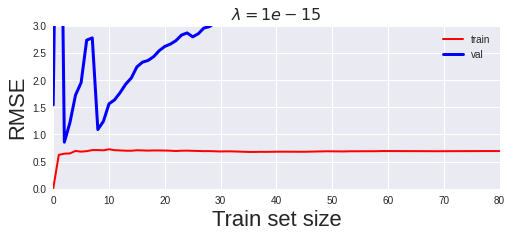

Train Erros [0.0, 0.4567828100747261, 0.49130581772437154, 0.43660219804026945, 0.4389959856909078, 0.46614124306140303, 0.4937828457165129, 0.5028045905754286, 0.5123556430844365, 0.5095375082911223, 0.49273956661637147, 0.4903729835066849, 0.49050145404275947, 0.49384659445117, 0.4898167051612539, 0.5100577638812922, 0.5116759103731332, 0.507724627987764, 0.5037028859544755, 0.49915555215008056, 0.500508256731426, 0.4995276011940024, 0.5483501500167337, 0.5422873103384711, 0.55155172824402, 0.5506978907219925, 0.5505730177026203, 0.5549614668727945, 0.5500457203133946, 0.550823328428714, 0.5505697564840841, 0.5575890979662904, 0.5586247469899025, 0.5579867216610543, 0.5606916114708438, 0.5572868066978092, 0.5601795745766308, 0.5541200579087415, 0.5507925214098546, 0.5496594718958431, 0.5530033482377943, 0.5507631801857263, 0.5486046458565424, 0.551319177670358, 0.5558682030487109, 0.5618124027557266, 0.5601848501359549, 0.5601947327697109, 0.5630499444193617, 0.562177935278342, 0.564

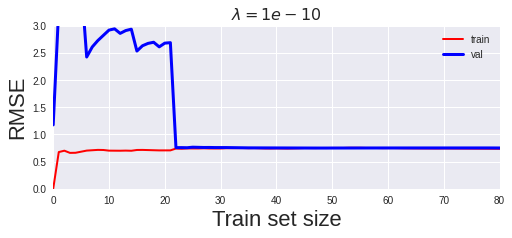

Train Erros [0.0, 0.5438768237773459, 0.5227512314896334, 0.5068364688860119, 0.5138609372354055, 0.4870201054520965, 0.48881744345403727, 0.4906766508745541, 0.4940426005577712, 0.4971321566046452, 0.4831811751851238, 0.47510183849207205, 0.47188866895707743, 0.47006702901021064, 0.46796377393693434, 0.48626256504613696, 0.4901421031773555, 0.4825243892147112, 0.49457114922218587, 0.4862965769051773, 0.48059997369320284, 0.48135382988551745, 0.4774347970946139, 0.480610053590763, 0.47524491934115587, 0.4716463392618511, 0.47609616788609643, 0.4743811355526951, 0.4734450841462748, 0.4797541946015122, 0.4836550586349831, 0.4901903690742419, 0.4961362316888314, 0.49379138190825095, 0.49036996779786307, 0.48818345884600317, 0.4931634558711142, 0.4952902138504831, 0.4983934731310201, 0.4956936408439563, 0.49595879144000593, 0.4949108872589721, 0.49778142047126495, 0.498155922338723, 0.49883414421790445, 0.5015641329307015, 0.5027087233188543, 0.5009900273066975, 0.5038606945773547, 0.50191

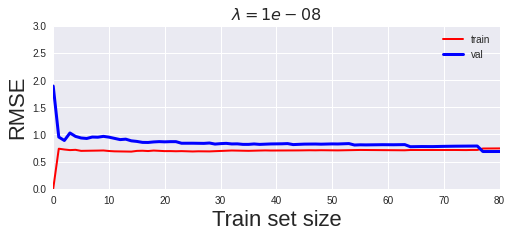

Train Erros [0.0, 0.4023899704510929, 0.4347544444699565, 0.43717291815989195, 0.47374334807380536, 0.5000323371347322, 0.4997761577517421, 0.48239255742508513, 0.4929416528839327, 0.499714886900326, 0.4830283398961848, 0.48050221690537415, 0.46316634108145543, 0.4573856339090846, 0.46797752303468715, 0.46831095956068464, 0.46416716704365685, 0.4654732277039737, 0.4654349234582943, 0.4904863185983401, 0.49233620733958244, 0.4924194618798192, 0.4947676815349835, 0.49800584697243655, 0.49162182727744397, 0.4906163511635665, 0.5230011099586552, 0.523229831557824, 0.5235564870972812, 0.522397422459722, 0.521200926611998, 0.5167011653621244, 0.5159516957097529, 0.514726436586805, 0.5177997236274506, 0.5122502305262475, 0.506692332477181, 0.5077247173283772, 0.5112057465818469, 0.5169177835838081, 0.5167148630635069, 0.5178171037616016, 0.5165673316658179, 0.5128114016192197, 0.5121777446930541, 0.5138641616581666, 0.5172058077445755, 0.5149609025834352, 0.5122764047527721, 0.510439969971124

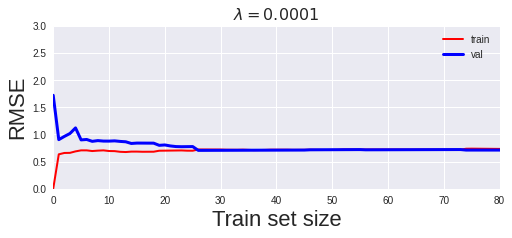

Train Erros [0.0, 0.5208928742792114, 0.48685107875433237, 0.5368430706531254, 0.4961379707565095, 0.5189989606843712, 0.5094905370220325, 0.4767374755416607, 0.476728276732673, 0.4587075772779379, 0.45124190223645405, 0.44884127618568787, 0.4472350902217825, 0.45130383484556924, 0.45658772783391816, 0.46013025962947696, 0.46077030500794897, 0.4587004779516601, 0.4627645637253699, 0.45697211324204934, 0.46157233184882335, 0.45928019321940944, 0.4555953539009078, 0.4539324988403237, 0.468798463242818, 0.46840574362410414, 0.46871568902947486, 0.47041534213962005, 0.46548949794084543, 0.46412268020622305, 0.46495017654605353, 0.46866376381282643, 0.4700074445727695, 0.4717026143017815, 0.47731108430297636, 0.4813016191910647, 0.48458157899915083, 0.4852935679470547, 0.48420912908437086, 0.48792750887713515, 0.4894309694709185, 0.48797806713679687, 0.4971107209579689, 0.49725729412589365, 0.49340391760322355, 0.4915885207300929, 0.49048891439400755, 0.49307638374469265, 0.494382737704876,

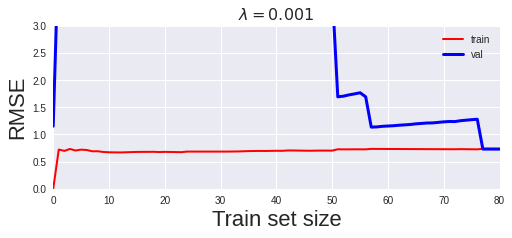

Train Erros [0.0, 0.46513938820338674, 0.4604705205286685, 0.4451881566451582, 0.4727181344418507, 0.4578532622516085, 0.5125502639572452, 0.5129337722057492, 0.5049728723195727, 0.5281761347794067, 0.5118917121836543, 0.48998190830260036, 0.5232366955552181, 0.5327011217062892, 0.5263158224337102, 0.5329335380965405, 0.5327094944212444, 0.5272686643672975, 0.5242421449214458, 0.5161343051348121, 0.5067242000346197, 0.5071939678299138, 0.5088425324309696, 0.5092007810613208, 0.5500675640133365, 0.5511077366321535, 0.5480679125616876, 0.5484372527000259, 0.5494977880233407, 0.5479298422139591, 0.540369212966434, 0.5331977374994228, 0.5312801906490592, 0.5276675103654812, 0.5355465651658566, 0.5400388002572584, 0.5368512208658892, 0.5414921649885562, 0.5377500543242049, 0.538512662587289, 0.5401892034245529, 0.5375681866892608, 0.5380653145575347, 0.5391930303901227, 0.5380498085537146, 0.5341122427061316, 0.533419035093235, 0.5327520847451066, 0.5307861993359405, 0.5285904022026552, 0.5

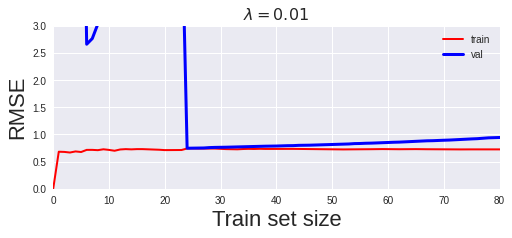

Train Erros [0.0, 0.5066962226119011, 0.48684830496487924, 0.43659203177503214, 0.5489881583211212, 0.5541820298102822, 0.5289388980460338, 0.5154156691878253, 0.5140877424174252, 0.543083462114856, 0.5481062250081395, 0.5566477544085281, 0.5371744726509007, 0.5268727191693316, 0.516038210564072, 0.509399226313752, 0.5131462260712372, 0.5143790960440848, 0.5075685705429088, 0.5229547061859098, 0.5211770604469023, 0.516804123762929, 0.5089795502941061, 0.508010351309466, 0.5035663413810159, 0.5059051452283266, 0.5032027575948061, 0.5049506073021747, 0.5119644170120279, 0.5130751306767506, 0.5180402053433366, 0.5182630589240593, 0.512425461065619, 0.5150769691045477, 0.5591636303004927, 0.5593368732530153, 0.5541752039226044, 0.5519410380760272, 0.5530760858607956, 0.5574141700141827, 0.5568484575957114, 0.5578768701309753, 0.5590996015581848, 0.5543399465133181, 0.5546334985517504, 0.5529933091769147, 0.5492536978116204, 0.5489569078524714, 0.5519713086658995, 0.5481789767404388, 0.5448

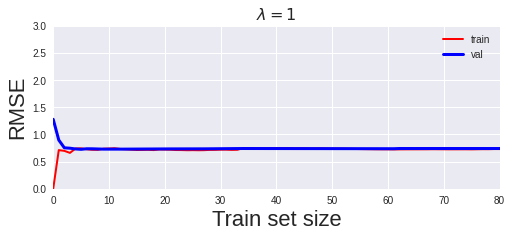

Train Erros [0.0, 0.6901621990120592, 0.5313609547324287, 0.5789042488918619, 0.5583620927211049, 0.5752714804728039, 0.5462097178569965, 0.5604419985611185, 0.5299695457429113, 0.5378384152333673, 0.5280221494300326, 0.531166884356738, 0.5261772013562458, 0.5529324553824152, 0.5433268571656062, 0.5481124179011784, 0.5506533827617985, 0.540564563541462, 0.5470967132074319, 0.5327995971000358, 0.5278733261272606, 0.5264645693189214, 0.5233124804137455, 0.5236854837299851, 0.5220542155606605, 0.5305581606764793, 0.5314889823349748, 0.5316913745538521, 0.5255662868085399, 0.5233848377951138, 0.5217763542006082, 0.5228679996591543, 0.5196046477925085, 0.5198959901021999, 0.5243249150695015, 0.519605624142873, 0.5209115700225002, 0.526006960977003, 0.518571573480921, 0.517824266574439, 0.5126744068195684, 0.5115711655500398, 0.515310732095077, 0.5108920161381619, 0.5077198899797306, 0.5193229470703096, 0.5195655022268927, 0.5178481475295112, 0.5228280695836077, 0.5234766229992378, 0.5219405

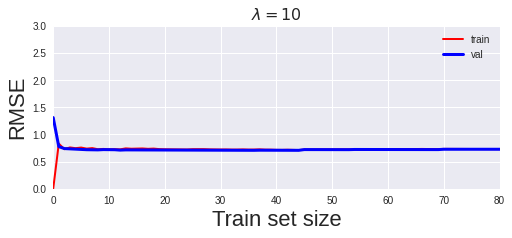

Train Erros [0.0, 0.5177248270664324, 0.46241930227374645, 0.4233716274004268, 0.43580253352052395, 0.5046328626686267, 0.5083337340559606, 0.4871565926526776, 0.5084429749790249, 0.49234165750017456, 0.48112462498907277, 0.5065468975072674, 0.5186720987022148, 0.5190086744033937, 0.5213231802676107, 0.519615548517339, 0.5112774572283952, 0.515274435912326, 0.5178024887943212, 0.5197951216083995, 0.5132419653304101, 0.508731613499846, 0.5123868016739891, 0.5189646547410943, 0.5172608252687644, 0.5142859291056836, 0.5157053838094199, 0.5160349196425882, 0.509806625967198, 0.5067972260498123, 0.5113411866742661, 0.5105726625530719, 0.519443448781321, 0.5221247277589712, 0.5185762278941803, 0.5158325401998323, 0.5179510433925987, 0.5146896118503242, 0.5110565581438555, 0.5084972600939549, 0.5060146741197145, 0.5117390085504084, 0.51065654920854, 0.5108291366822791, 0.5080396254441468, 0.5068558609316404, 0.5070026642168122, 0.5088871229904959, 0.5101761084065518, 0.5076805174876332, 0.509

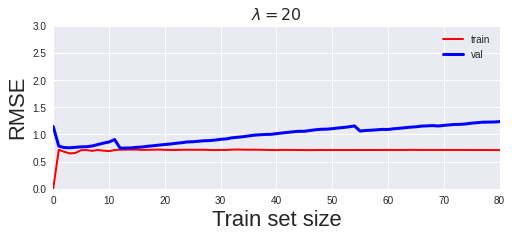

Train Erros [0.0, 0.6871501675121908, 0.5320227144007159, 0.6005835313507156, 0.5601726859098692, 0.5931610336043597, 0.5707494690603759, 0.5477228757960585, 0.5371172347197191, 0.5499974729847827, 0.5445862451861582, 0.5328321810928317, 0.5290468077075225, 0.5155122149740733, 0.5243835492595328, 0.5171087687448768, 0.5122507199000487, 0.5100164265312247, 0.5080972662921266, 0.5129586515975361, 0.5030251852822001, 0.5011098302060137, 0.4960448623050138, 0.49493819559015756, 0.48958390400132434, 0.4842166029639693, 0.4760548159124826, 0.47763338686679513, 0.48493878760390685, 0.4789794470010892, 0.4837157410760781, 0.4860248129523123, 0.4849306392241487, 0.48490682035241006, 0.48378806065270635, 0.4820850349285116, 0.4830744672039386, 0.4867274435034708, 0.4866812460052442, 0.4908671984070049, 0.49129796079349985, 0.49490591714827603, 0.4987571550848791, 0.5088485242415909, 0.5079863420810022, 0.5060493290121615, 0.5055892419700998, 0.5031739886792193, 0.5029186641464655, 0.500744297874

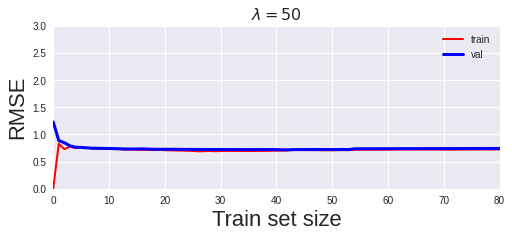

Train Erros [0.0, 0.7039047712179808, 0.5833756366848156, 0.5445654063537951, 0.5421544207206751, 0.5545980316974424, 0.5558359742475748, 0.5708724463002338, 0.556504466263053, 0.5359034774170173, 0.5343032650929934, 0.5279924722828941, 0.5263540322648119, 0.5227486690031236, 0.5197239451535114, 0.5153545415433924, 0.5152800873311798, 0.5220816975759377, 0.521919913366397, 0.5206667901028335, 0.5134275699533112, 0.5157773652591192, 0.5230320859653512, 0.5208870065749596, 0.5284420069970154, 0.5295638655628295, 0.531101759046491, 0.5338179098421308, 0.5359409664070913, 0.5400306442499442, 0.5361315717146001, 0.5310601931857054, 0.5295277045078723, 0.5261345304856585, 0.5225901556555074, 0.5260236273063443, 0.5248390818660383, 0.5253035682664859, 0.5221157148672301, 0.5236830785287429, 0.5238110169421698, 0.5212577014404389, 0.5172907273738047, 0.5197381987478326, 0.51977751893808, 0.5211146401945841, 0.519016577818907, 0.5170615954650573, 0.5207351172886387, 0.5215062534154316, 0.520372

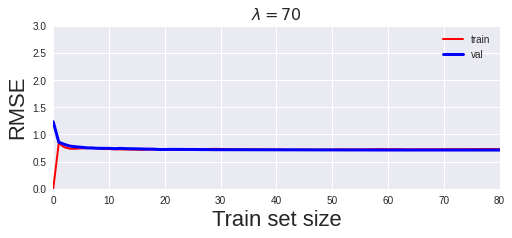

Train Erros [0.0, 0.9053839740357569, 0.9060573076344539, 0.8791704347735023, 0.8255691243811342, 0.7994329208292374, 0.7373463863642584, 0.7224080537432997, 0.7167632516075534, 0.6898333167076082, 0.6805855593451102, 0.6802184973516158, 0.6627069438104944, 0.6657556622706683, 0.6476601762713187, 0.6525480687557437, 0.6564780962404637, 0.644648568197389, 0.6406648283880706, 0.6335168496795337, 0.6217007710535221, 0.6187794693660589, 0.6104109888917865, 0.6104660591865965, 0.6122546127275049, 0.6106081802675166, 0.6065546823619381, 0.6038546895210554, 0.5966860311591003, 0.5937416292273759, 0.5886635025835969, 0.5916697415162196, 0.5910543768684554, 0.5878337469748985, 0.5810618163028332, 0.5774340771442964, 0.574313529445216, 0.5717752433631598, 0.5715747323583692, 0.5676063077741326, 0.5637312143580366, 0.5690836618294293, 0.5665173592258022, 0.5658016852715824, 0.563729897583395, 0.5617004487180266, 0.558573453935228, 0.5564349736361119, 0.5584288934615944, 0.5551600679385654, 0.5500

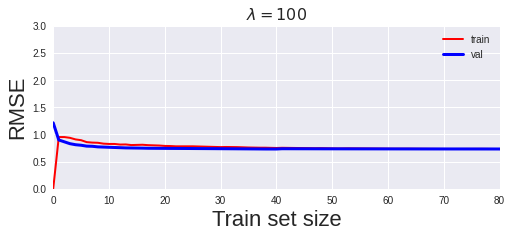

In [ ]:
from sklearn.linear_model import Ridge

for alpha_range in [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 10, 20, 50, 70, 100]:
  plt.figure(figsize=(8,3))
  ridge_regression = Ridge(alpha=alpha_range, solver='cholesky')
  plot_learning_curves(ridge_regression, X_train, y_train)
  plt.axis([0, 80, 0, 3])
  plt.title(r"$\lambda = {}$".format(alpha_range), fontsize=16)
  plt.show()


#### Using Gridsearch to select the optimal values of $\lambda$

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 10, 20, 50, 70, 100]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regression.fit(X_train_norm, y_train)

print('Best parameter', ridge_regression.best_params_)
print('Best Score',-ridge_regression.best_score_)

pred_test_rr= ridge_regression.predict(X_test_norm)
print('MSE for test prediction', mean_squared_error(y_test,pred_test_rr))


Best parameter {'alpha': 20}
Best Score 0.5397676233324156
MSE for test prediction 0.5378202207225878


### **Lasso Regression**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.352236572008547, tolerance: 0.0126189738609701
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.97442727697015, tolerance: 0.02549670998451592
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.56499563904458, tolerance: 0.0365

Train Erros [0.0, 0.3832126054903573, 0.4674072366308833, 0.4422923298923952, 0.5399856475929505, 0.5437146753219271, 0.5471102117991687, 0.5396687100318707, 0.5244920843421738, 0.5280553787642369, 0.5262487075185893, 0.5170955239802092, 0.5256939849015675, 0.5251216639834235, 0.5341501339278264, 0.5148118756370665, 0.5193660119309501, 0.517008940018129, 0.5177058399314406, 0.5160623450486114, 0.5255196778119157, 0.5163395068619069, 0.5135783856605488, 0.5156406457887008, 0.5140486734139474, 0.5133188482983841, 0.5148845447479474, 0.5190529126580335, 0.5156010959519592, 0.5108163447718925, 0.5094172985962625, 0.5110445467189321, 0.5127845340780377, 0.5138093883802027, 0.5160109469663559, 0.5204472576682464, 0.5258899787434989, 0.5262210463848549, 0.5233064160461064, 0.5217970384670809, 0.5191407368085109, 0.5169368345058843, 0.5213959878712378, 0.5205118865941333, 0.5178063018471023, 0.5219522224613203, 0.5236224674670147, 0.5265179071882835, 0.5257616627523358, 0.5243746310014263, 0.5

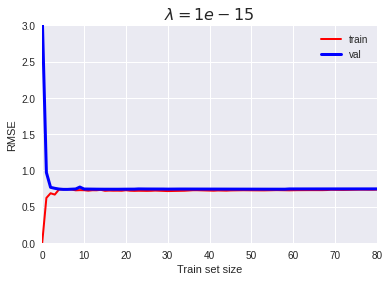

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.987822060737187, tolerance: 0.01459052251628297
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.90237796966731, tolerance: 0.026594772451775613
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67.37976429602337, tolerance: 0.04

Train Erros [0.0, 0.45524589796452447, 0.40703328907257486, 0.44778750370989495, 0.4286234440052227, 0.4187239619969407, 0.43348029871074945, 0.43646989484244003, 0.4368678960829293, 0.48536882230148987, 0.4830220608909937, 0.47592062500273297, 0.48159366699523265, 0.4782120636898644, 0.46745375941372075, 0.478672746017739, 0.4856564810253609, 0.49592203019812775, 0.48837802868719593, 0.49221396150652696, 0.4870147626022535, 0.48443705401946785, 0.48796591990465127, 0.48875572470345996, 0.4864763246428818, 0.48214679040287545, 0.4764604402804817, 0.4761589082907587, 0.47364505957584996, 0.47145625553872483, 0.47546617791502094, 0.47480494964707654, 0.47099930829767767, 0.46836101362601923, 0.4705145437824792, 0.4656480800119214, 0.47012591460747566, 0.4676824497664742, 0.4649122804220553, 0.46582696926267453, 0.4691110473195608, 0.46836189063411465, 0.4682607485112154, 0.46496850445017424, 0.4625708247702198, 0.46073394329063394, 0.459210881940353, 0.4586094396962904, 0.457159834310414

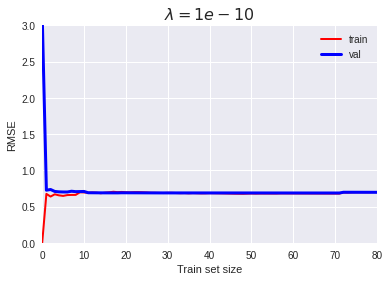

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.242798452620793, tolerance: 0.014756711720047524
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.94529358033782, tolerance: 0.029620796224061885
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69.1068526388641, tolerance: 0.04

Train Erros [0.0, 0.46105424022683655, 0.4799577823652416, 0.5687006631988786, 0.5588050495132071, 0.5342043930110526, 0.5344896551103251, 0.5222493952785575, 0.5105686707127234, 0.5113915648297094, 0.515393522866519, 0.5029017585843772, 0.5051293059033072, 0.4995484713563461, 0.4967954147414723, 0.4972271570305815, 0.49791941224407976, 0.490952794813469, 0.49381808678454314, 0.4916381139289095, 0.4862559719299228, 0.4915974090327092, 0.4868293173457673, 0.4907986603425065, 0.5030143825127337, 0.5035649579988284, 0.49625907281155196, 0.49669218513957836, 0.4914920284151661, 0.4918069753726875, 0.49629003593173493, 0.49989918813920986, 0.49765865120148034, 0.4997561402398983, 0.4982736858125725, 0.49871255402044534, 0.4963444778457538, 0.5055280429518194, 0.5052541101705309, 0.5077682674688279, 0.5048404079475391, 0.5050257691874951, 0.5034853399766572, 0.5037294085493332, 0.5043010413962986, 0.5043119339851369, 0.5074384154251922, 0.5292557845153845, 0.5315952150025295, 0.5289538986400

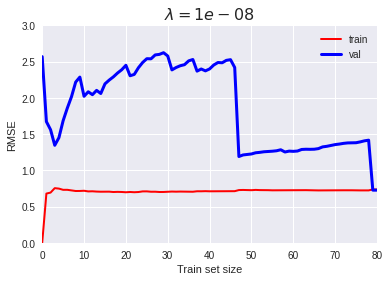

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4417213819599013, tolerance: 0.01641694461782752
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3418297046954706, tolerance: 0.029267751822880092
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07884929189683021, tolerance: 0

Train Erros [0.0, 0.5211847394846862, 0.5423046014572052, 0.5114667125387448, 0.49486211369056826, 0.49924392751171887, 0.49859248722349814, 0.4956104559202836, 0.5001039061266915, 0.5177338262414538, 0.5010906675150254, 0.48974831502950184, 0.48556406002880964, 0.48416903583291, 0.4852072030744298, 0.48528124474600687, 0.49104804399996804, 0.4883810796674989, 0.4914412646919057, 0.49235309412928185, 0.5009907609239328, 0.5032772132889568, 0.510423884038508, 0.5130184319722916, 0.5130947248511468, 0.5088195345950166, 0.5078931478462059, 0.5034126174225484, 0.5026908013612058, 0.501106978159575, 0.5063312583022138, 0.5071306216876719, 0.5052480818513417, 0.5042382202417071, 0.5023929291857827, 0.5033533590425628, 0.5046800735605989, 0.5018622419758711, 0.5067643345010124, 0.5037024736118608, 0.5055709541271352, 0.5100462994293042, 0.5066562495105584, 0.5039632069162616, 0.5028169208477408, 0.5038915859066962, 0.5048993740438582, 0.5038505408974843, 0.5063514515471365, 0.5076410920868708

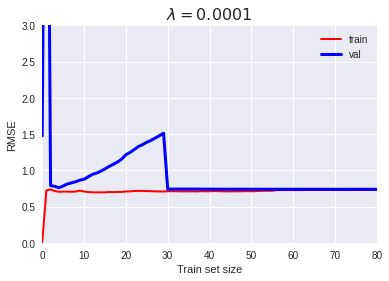

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7300784868144348, tolerance: 0.033088109236369054
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.46956682488693957, tolerance: 0.04768488293573488
  positive)


Train Erros [0.0, 0.43491985363461066, 0.47496000609823735, 0.45605024930537996, 0.4742198129773365, 0.46272748875589886, 0.44441280020158275, 0.5088300056085259, 0.48710405338523644, 0.5012186754246274, 0.5253272153722519, 0.5267709768487271, 0.5173233719278109, 0.5073861225693457, 0.5094557145767331, 0.5056635018280924, 0.5030015495547477, 0.5122196406139146, 0.5113127289912709, 0.5160392424982009, 0.5215809529983102, 0.5249227185881553, 0.5301675351618931, 0.5221988656496782, 0.523533160174533, 0.5291093453090879, 0.535284562381688, 0.5389528549340566, 0.5360068576091039, 0.5352820018166039, 0.5343726380543786, 0.5380922710449161, 0.5430918525384096, 0.5381376484948589, 0.5311648768998165, 0.5320023732047164, 0.5303133470791557, 0.5317307611564909, 0.5319140304208436, 0.5280596885437833, 0.5273764778321423, 0.5257250921727029, 0.5257653528523426, 0.5246475375520825, 0.5222542637220796, 0.5232599202149469, 0.522724881185956, 0.5214901739761045, 0.5198162129597491, 0.5206171123063497,

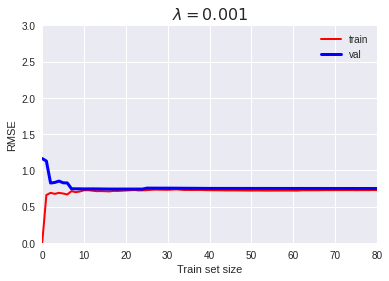

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4344576877262654, tolerance: 0.02246353279707313
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.19943181134289034, tolerance: 0.03751458602599302
  positive)


Train Erros [0.0, 0.4428616171647457, 0.39469288629928684, 0.4230240781881762, 0.4328075394018911, 0.4670718046585762, 0.47387077572939734, 0.4607924683265548, 0.4858199153163273, 0.48398060621131117, 0.48363721366292206, 0.4808367793366543, 0.4798480158755615, 0.4920993854030851, 0.4928604246084746, 0.48962045139980875, 0.49562675587909444, 0.49749422666984033, 0.5023638058777742, 0.5076420462498694, 0.5024244395733805, 0.4941812524033783, 0.4975055056657852, 0.49381030279015886, 0.4884689329991648, 0.4936305038653293, 0.4871899686167355, 0.48175808764485833, 0.4868199439745354, 0.49538176634100356, 0.49128312452018175, 0.4906607453492362, 0.48831985409118844, 0.4912941068977506, 0.4883364907621014, 0.49405801233812324, 0.4961977787039677, 0.4967166772915321, 0.5025224750711861, 0.5068290523930751, 0.509110254654041, 0.5101398045080906, 0.507952756448366, 0.5035360599148476, 0.5035579274832115, 0.5025721124625879, 0.503851556434189, 0.5067692303773206, 0.5058930160907694, 0.5151019823

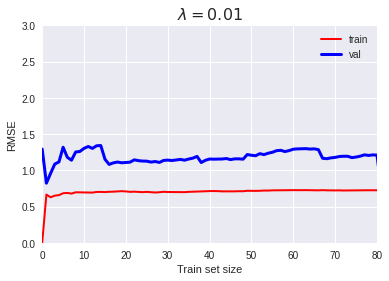

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


Train Erros [0.0, 1.503908777490148, 1.5731796206150042, 1.4353197931766954, 1.4915287358025433, 1.4286652567271834, 1.3936537513465164, 1.4056420936181935, 1.4006768461574157, 1.3940930132840104, 1.3939130560555275, 1.3972289183048607, 1.4437881066394234, 1.4234108458232413, 1.417826544486712, 1.4404024724118463, 1.4256396330847962, 1.398923719611224, 1.4120867430786848, 1.4188538088434863, 1.411793661253403, 1.420816412493596, 1.394398846449621, 1.3834331373467952, 1.3788277414059191, 1.3923672552312938, 1.3882208115853698, 1.3877471935320784, 1.3951632414928308, 1.3970587507504348, 1.3900991209658322, 1.3969501201497758, 1.3945482225467796, 1.391494885906395, 1.3987554317162858, 1.4005389655377125, 1.3990514058048313, 1.3947114861879628, 1.390798277644853, 1.3815746159612463, 1.3914519777081027, 1.3906039679518238, 1.3816302467816004, 1.3821234668882911, 1.3747983412829266, 1.3861786406563232, 1.389670944736923, 1.388550646287064, 1.3816513877027607, 1.3857926158021245, 1.3847890880

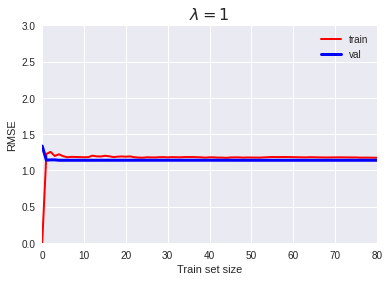

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


Train Erros [0.0, 1.2542536248580531, 1.1860479836002673, 1.1713289340525048, 1.2873248390172498, 1.2733040089838765, 1.212068856314334, 1.2093887752601946, 1.2134715664809017, 1.1868279691705934, 1.2247181632110864, 1.2408605080444493, 1.2448752114989414, 1.255430103189358, 1.2606459633576004, 1.2686191346471738, 1.25859933071147, 1.2542933766686544, 1.2474787892820507, 1.2649639800825492, 1.2580655438485011, 1.2771826768391845, 1.2781899458683061, 1.2834524813819397, 1.288102195173863, 1.2813741665679197, 1.2800090582602413, 1.2898349146747223, 1.2911525044914347, 1.2842652369871304, 1.2833071282138642, 1.2907857872161008, 1.296029662639581, 1.286033269501475, 1.285350227795524, 1.290739261864158, 1.2888825056899949, 1.2910131659207165, 1.299502000540711, 1.298206386404401, 1.2980251919835941, 1.292409509376195, 1.2985639147792771, 1.2998665427724008, 1.2997495871085896, 1.2997499432735078, 1.298555252143316, 1.301869413055089, 1.297062208253497, 1.2989795431787383, 1.294468083141603

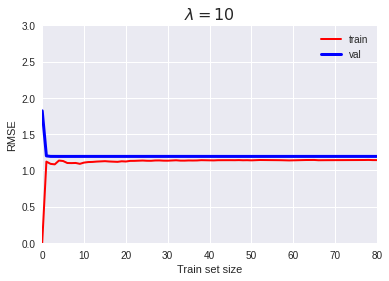

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


Train Erros [0.0, 1.3739969958457796, 1.3389834250811068, 1.276519560012172, 1.3129857191661358, 1.2993905993169141, 1.2942191653636335, 1.3107681232648372, 1.3066070988851743, 1.296138239690574, 1.2938739304117766, 1.3222656963364448, 1.351306662088591, 1.3297616642462085, 1.3456395068329987, 1.3283098233292037, 1.341683412931181, 1.3414944188818405, 1.3434189701678474, 1.3387538346365586, 1.3513013114136307, 1.339764366687225, 1.3319551699682786, 1.3317766620022606, 1.3296128871195039, 1.3338807839921958, 1.3258032849788435, 1.33602452329105, 1.3395378544492627, 1.3467086284900966, 1.3517739538752862, 1.3590320595829986, 1.36039766002809, 1.3583770833923374, 1.3583988712954636, 1.361123878037815, 1.3632264344716225, 1.3556238481611445, 1.3526298804468404, 1.366547515008138, 1.35952818752879, 1.3584341922049152, 1.3628873464724305, 1.3635773610934603, 1.359168662625843, 1.3606066549332811, 1.35376377792843, 1.3521960865125204, 1.3492783878238328, 1.3509655229094109, 1.348753400412666,

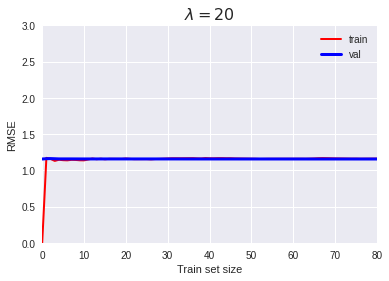

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


Train Erros [0.0, 1.4569208911103813, 1.3442050113436002, 1.2396073234576528, 1.2000913296145037, 1.278852405998733, 1.3157337153733244, 1.3287734764010433, 1.3405575859770187, 1.3342460474205895, 1.344282548022977, 1.3549870265147066, 1.3414014110544883, 1.3459863496156919, 1.320132641270575, 1.3146325036661033, 1.294518198242426, 1.2756215182183723, 1.28126425380181, 1.2855441768490339, 1.2678140542554157, 1.275617114723705, 1.2645887002367096, 1.2613651574396698, 1.2678560907804464, 1.2808013190282557, 1.2787817497989669, 1.2788249290287192, 1.277755338614764, 1.288023111430484, 1.2942769646973031, 1.296336324263258, 1.3011858764700033, 1.301246705322561, 1.3071244179691597, 1.3053688161353387, 1.2936497512384122, 1.2892132183214313, 1.292528582315199, 1.292436694885076, 1.295202090276721, 1.3052603759241408, 1.3012054811801295, 1.309962033807994, 1.3214724743321435, 1.325560534159399, 1.32855895381989, 1.3261931199245398, 1.325967338708049, 1.3209521358568193, 1.322120656053348, 1.

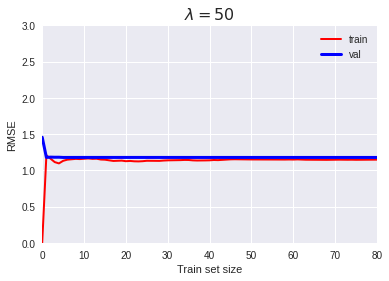

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


Train Erros [0.0, 1.3246379427064015, 1.211252624350744, 1.2123183201221486, 1.2811497254721638, 1.2298684374953168, 1.2363522758354903, 1.2056496916171606, 1.214620679249556, 1.2197304798901198, 1.1868585566389847, 1.1960711186787087, 1.210330311025682, 1.2185281030852237, 1.2241613873078554, 1.230412786616399, 1.246277015414352, 1.2473140351810204, 1.2533298825022803, 1.2556092791279088, 1.2613901385981157, 1.269411988418768, 1.2911071209817084, 1.3020613772637002, 1.3088136934244285, 1.3161643051992038, 1.3102611115543257, 1.3248020926993904, 1.3321926464359126, 1.342533045788455, 1.338518995867628, 1.347584631272818, 1.343815155484254, 1.33482290074341, 1.338655815369093, 1.3337434618795614, 1.3388546185030799, 1.334503590139351, 1.3359297137102528, 1.3306254563851767, 1.3308526327091208, 1.337180170311221, 1.329236783005627, 1.3307078871387772, 1.332799623515827, 1.328921668728358, 1.3360033556372184, 1.3317788460050495, 1.3305566503799369, 1.3295711920127966, 1.3309633901602456, 

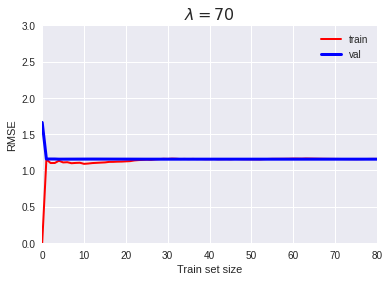

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


Train Erros [0.0, 1.4625398521830015, 1.457478360212539, 1.4096095729697133, 1.347981857648931, 1.3482072804169896, 1.3200725810130214, 1.3022527851027916, 1.2980565175490808, 1.3093878527464784, 1.3203485968052946, 1.312990719270562, 1.3171796997255576, 1.3175744550376332, 1.3025921116251262, 1.3071076850655987, 1.3054230093346888, 1.2915613959377161, 1.305108108180739, 1.2967860132833295, 1.3032178639260479, 1.3079970052510255, 1.3165973859251945, 1.3107185438804252, 1.314241537638376, 1.319409203414522, 1.318224389322127, 1.3100171270578136, 1.323219761495979, 1.3213425450943659, 1.3224124034205087, 1.3129022232139071, 1.3088321651407349, 1.3039443282404415, 1.3087376787482032, 1.3133047426768507, 1.303126514040907, 1.305440404457653, 1.3081711380850465, 1.3097218641702333, 1.3169427608412272, 1.313445601491028, 1.3079941071387955, 1.3111157539878395, 1.3087305507613505, 1.3146736217541355, 1.314198313023473, 1.312105441844813, 1.3132359782784864, 1.3073048551561324, 1.3003501933457

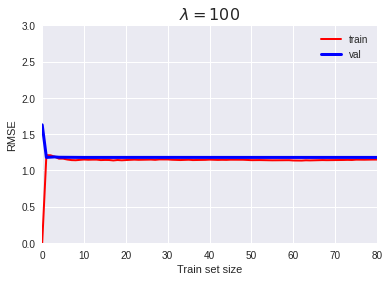

In [ ]:
from sklearn.linear_model import Lasso

for alpha_range in [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 10, 20, 50, 70, 100]:
  lasso_regression = Lasso(alpha=alpha_range,max_iter=100)
  plot_learning_curves(lasso_regression, X_train, y_train)
  plt.axis([0, 80, 0, 3])
  plt.title(r"$\lambda = {}$".format(alpha_range), fontsize=16)
  plt.show()


#### Using Gridsearch to select the optimal values of $\lambda$

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()

parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 10, 20, 50, 70, 100]}
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(X_train_norm, y_train)

print('Best parameter', lasso_regression.best_params_)
print('Best Score', -lasso_regression.best_score_)

pred_test_rr= lasso_regression.predict(X_test_norm)
print('MSE for test prediction', mean_squared_error(y_test,pred_test_rr))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.696209135961, tolerance: 1.7352830983432534
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107.24682392223167, tolerance: 1.7735429123237387
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122.7366596965876, tolerance: 1.7761208564353166
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.8741763

Best parameter {'alpha': 0.001}
Best Score 0.5396701741820324
MSE for test prediction 0.5379767869560712


#Common pitfalls in the interpretation of coefficients of linear models




* Coefficients must be scaled to the same unit of measure to retrieve feature importance. Scaling them with the standard-deviation of the feature is a useful proxy.

* Coefficients in multivariate linear models represent the dependency between a given feature and the target, conditional on the other features.

* Correlated features induce instabilities in the coefficients of linear models and their effects cannot be well teased apart.

* Different linear models respond differently to feature correlation and coefficients could significantly vary from one another.

* Inspecting coefficients across the folds of a cross-validation loop gives an idea of their stability.

For more details on common pitfalls in the interpretation of coefficients of linear models
, pls refer to: https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#sphx-glr-auto-examples-inspection-plot-linear-model-coefficient-interpretation-py